# **Aluno: Breno Passos**

### Bibliotecas utilizadas no código

In [23]:
import pandas as pd  # Importando a biblioteca pandas para lidar com conjuntos de dados em formato de quadro de dados
import numpy as np  # Importando a biblioteca numpy para manipulação de arrays numéricos
import matplotlib.pyplot as plt  # Importando a biblioteca matplotlib para plotagem de gráficos
from keras.models import Sequential  # Importando o modelo Sequential do Keras para criar modelos de redes neurais sequenciais
from keras.layers import Dense, LSTM, SimpleRNN, GRU  # Importando as camadas Dense, LSTM, RNN e GRU
from sklearn.model_selection import train_test_split  # Importando a função train_test_split do scikit-learn para dividir os dados em conjuntos de treinamento e teste
from sklearn.preprocessing import MinMaxScaler  # Importando MinMaxScaler do scikit-learn para normalizar os dados

### Carregando dados do CSV


In [24]:
# Carregando os dados do arquivo CSV
data1 = pd.read_csv('all_stocks_5yr.csv')
data = data1.loc[data1['Name'] == 'AAL']
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


### RNN


Epoch 1/20
32/32 [==============================] - 2s 14ms/step - loss: 0.0207 - val_loss: 0.0119
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 8.5407e-04 - val_loss: 0.0011
Epoch 11/20
32

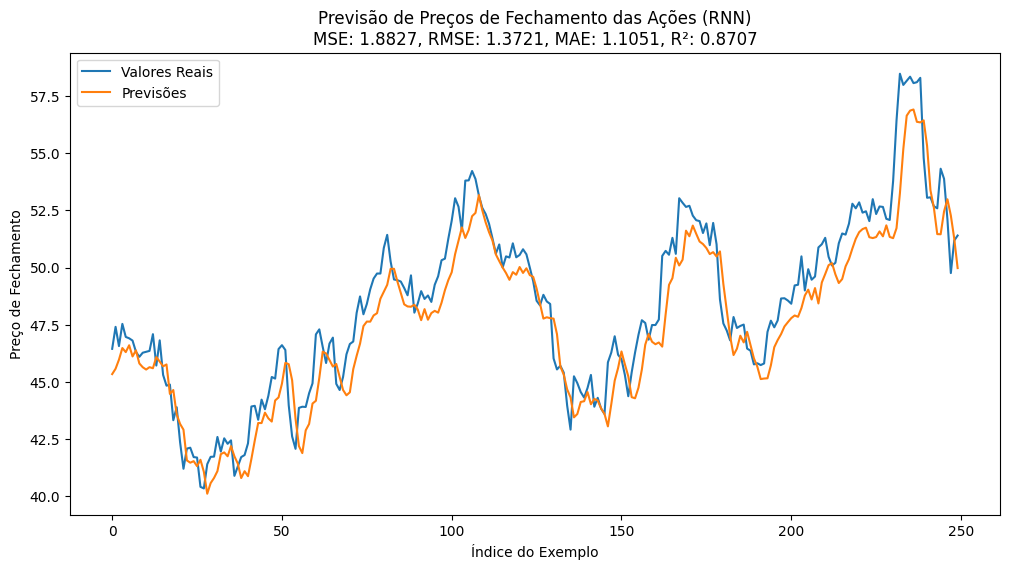

In [25]:
target = data['close'].values  # Extrai os preços de fechamento da variável 'data' e os armazena na variável 'target'

window_size = 10 # Valor da janela temporal

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))  # Inicializa o normalizador para escalar os dados entre 0 e 1
target_scaled = scaler.fit_transform(target.reshape(-1, 1))  # Aplica a normalização aos dados de fechamento e remodela-os para uma matriz bidimensional

# Criando dados de entrada e saída para a RNN
X = []  # Inicializa uma lista para armazenar as sequências de entrada
Y = []  # Inicializa uma lista para armazenar os valores de saída correspondentes
for i in range(len(target_scaled) - window_size):  # Itera sobre os dados normalizados com base no tamanho da janela temporal
    X.append(target_scaled[i:i+window_size])  # Adiciona a subsequência de entrada à lista X
    Y.append(target_scaled[i+window_size])  # Adiciona o próximo valor como saída correspondente à lista Y

X = np.array(X)  # Converte a lista de entradas em uma matriz numpy
Y = np.array(Y)  # Converte a lista de saídas em uma matriz numpy

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)  # Divide os dados em 80% para treinamento e 20% para teste, mantendo a ordem original

# Criando o modelo RNN Simples
model = Sequential([  # Inicializa o modelo sequencial
    SimpleRNN(64, input_shape=(window_size, 1)),  # Adiciona uma camada RNN simples com 64 unidades e especifica a forma de entrada
    Dense(1)  # Adiciona uma camada densa com 1 neurônio para a saída
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Compila o modelo com o otimizador Adam e a função de perda erro médio quadrático

# Treinando o modelo
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))  # Treina o modelo com 20 épocas, tamanho de lote de 32 e usa os dados de teste para validação

# Avaliando o modelo
loss = model.evaluate(X_test, Y_test)  # Avalia o desempenho do modelo nos dados de teste
print("Loss:", loss)  # Imprime a perda (loss)

# Fazendo predições
predictions = model.predict(X_test)  # Faz previsões usando o conjunto de teste

# Desnormalizando as predições
predictions = scaler.inverse_transform(predictions)  # Desnormaliza as previsões de volta ao intervalo original dos preços das ações
Y_test_inv = scaler.inverse_transform(Y_test)  # Desnormaliza os valores reais de volta ao intervalo original

# Calculando o MSE
mse = mean_squared_error(Y_test_inv, predictions)  # Calcula o erro quadrático médio entre os valores reais e as previsões
print("MSE:", mse)  # Imprime o MSE

# Calculando o RMSE
rmse = np.sqrt(mse)  # Calcula a raiz quadrada do MSE para obter o RMSE
print("RMSE:", rmse)  # Imprime o RMSE

# Calculando o MAE
mae = mean_absolute_error(Y_test_inv, predictions)  # Calcula o erro absoluto médio entre os valores reais e as previsões
print("MAE:", mae)  # Imprime o MAE

# Calculando o R²
r2 = r2_score(Y_test_inv, predictions)  # Calcula o coeficiente de determinação (R²) entre os valores reais e as previsões
print("R²:", r2)  # Imprime o R²

# Plotando os resultados
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(Y_test_inv, label='Valores Reais')  # Plota os valores reais
plt.plot(predictions, label='Previsões')  # Plota as previsões
plt.title('Previsão de Preços de Fechamento das Ações (RNN)\nMSE: {:.4f}, RMSE: {:.4f}, MAE: {:.4f}, R²: {:.4f}'.format(mse, rmse, mae, r2))  # Adiciona um título ao gráfico com as métricas
plt.xlabel('Índice do Exemplo')  # Adiciona um rótulo ao eixo x
plt.ylabel('Preço de Fechamento')  # Adiciona um rótulo ao eixo y
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico


### LSTM

Epoch 1/20
32/32 [==============================] - 3s 27ms/step - loss: 0.0596 - val_loss: 0.0191
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 9/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/20
32/3

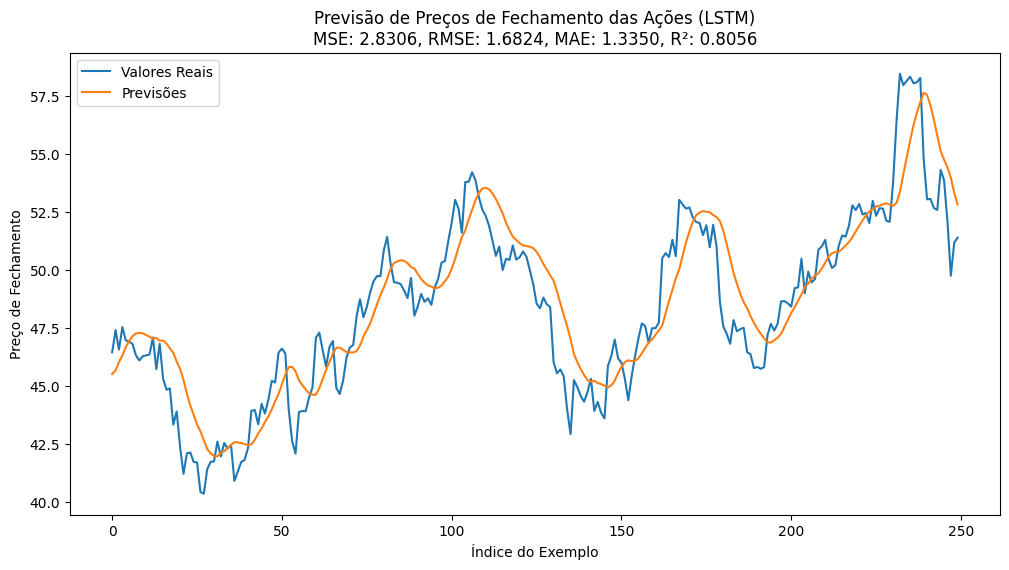

In [26]:
target = data['close'].values  # Extrai os preços de fechamento da variável 'data' e os armazena na variável 'target'

window_size = 10  # Define o tamanho da janela temporal

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))  # Inicializa o normalizador para escalar os dados entre 0 e 1
target_scaled = scaler.fit_transform(target.reshape(-1, 1))  # Aplica a normalização aos dados de fechamento e remodela-os para uma matriz bidimensional

# Criando dados de entrada e saída para a LSTM
X = []  # Inicializa uma lista para armazenar as sequências de entrada
Y = []  # Inicializa uma lista para armazenar os valores de saída correspondentes
for i in range(len(target_scaled) - window_size):  # Itera sobre os dados normalizados com base no tamanho da janela temporal
    X.append(target_scaled[i:i+window_size])  # Adiciona a subsequência de entrada à lista X
    Y.append(target_scaled[i+window_size])  # Adiciona o próximo valor como saída correspondente à lista Y

X = np.array(X)  # Converte a lista de entradas em uma matriz numpy
Y = np.array(Y)  # Converte a lista de saídas em uma matriz numpy

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)  # Divide os dados em 80% para treinamento e 20% para teste, mantendo a ordem original

# Criando o modelo LSTM
model = Sequential([  # Inicializa o modelo sequencial
    LSTM(64, input_shape=(window_size, 1)),  # Adiciona uma camada LSTM com 64 unidades e especifica a forma de entrada
    Dense(1)  # Adiciona uma camada densa com 1 neurônio para a saída
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Compila o modelo com o otimizador Adam e a função de perda erro médio quadrático

# Treinando o modelo
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))  # Treina o modelo com 20 épocas, tamanho de lote de 32 e usa os dados de teste para validação

# Avaliando o modelo
loss = model.evaluate(X_test, Y_test)  # Avalia o desempenho do modelo nos dados de teste
print("Loss:", loss)  # Imprime a perda (loss)

# Fazendo predições
predictions = model.predict(X_test)  # Faz previsões usando o conjunto de teste

# Desnormalizando as predições
predictions = scaler.inverse_transform(predictions)  # Desnormaliza as previsões de volta ao intervalo original dos preços das ações
Y_test_inv = scaler.inverse_transform(Y_test)  # Desnormaliza os valores reais de volta ao intervalo original

# Calculando o MSE
mse = mean_squared_error(Y_test_inv, predictions)  # Calcula o erro quadrático médio entre os valores reais e as previsões
print("MSE:", mse)  # Imprime o MSE

# Calculando o RMSE
rmse = np.sqrt(mse)  # Calcula a raiz quadrada do MSE para obter o RMSE
print("RMSE:", rmse)  # Imprime o RMSE

# Calculando o MAE
mae = mean_absolute_error(Y_test_inv, predictions)  # Calcula o erro absoluto médio entre os valores reais e as previsões
print("MAE:", mae)  # Imprime o MAE

# Calculando o R²
r2 = r2_score(Y_test_inv, predictions)  # Calcula o coeficiente de determinação (R²) entre os valores reais e as previsões
print("R²:", r2)  # Imprime o R²

# Plotando os resultados
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(Y_test_inv, label='Valores Reais')  # Plota os valores reais
plt.plot(predictions, label='Previsões')  # Plota as previsões
plt.title('Previsão de Preços de Fechamento das Ações (LSTM)\nMSE: {:.4f}, RMSE: {:.4f}, MAE: {:.4f}, R²: {:.4f}'.format(mse, rmse, mae, r2))  # Adiciona um título ao gráfico com as métricas
plt.xlabel('Índice do Exemplo')  # Adiciona um rótulo ao eixo x
plt.ylabel('Preço de Fechamento')  # Adiciona um rótulo ao eixo y
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico


### GRU

Epoch 1/20
32/32 [==============================] - 3s 23ms/step - loss: 0.0725 - val_loss: 0.0091
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 9.7875e-04
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 9.4756e-04 - val_loss: 9.2610e-04
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 8.5231e-04 - val_loss: 8.6686e-04
Epoch 7/20
32/32 [==============================] - 0s 8ms/step - loss: 8.2907e-04 - val_loss: 8.2134e-04
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 8.1014e-04 - val_loss: 8.0134e-04
Epoch 9/20
32/32 [==============================] - 0s 8ms/step - loss: 7.8805e-04 - val_loss: 7.6368e-04
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 

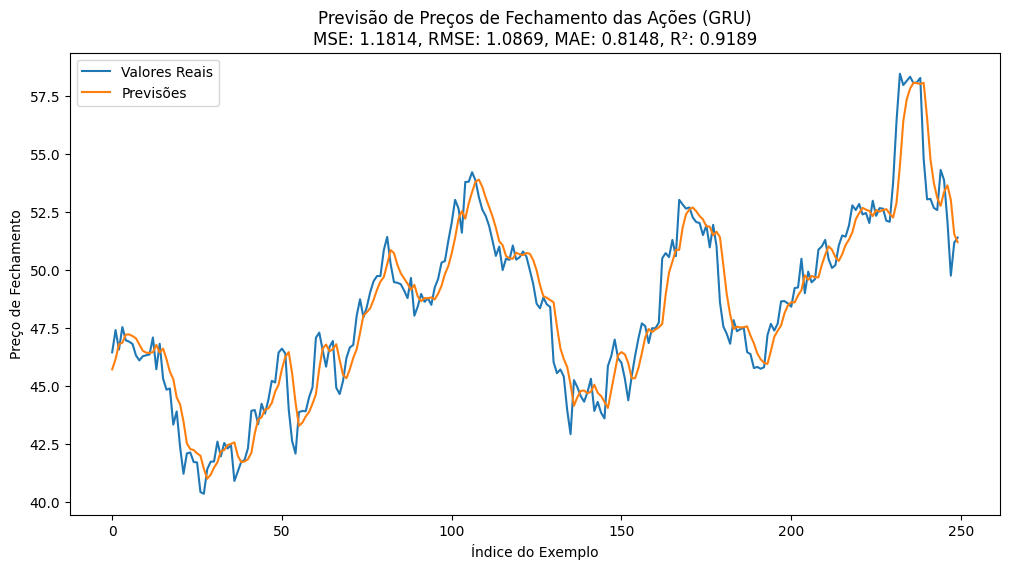

In [27]:
target = data['close'].values  # Extrai os preços de fechamento da variável 'data' e os armazena na variável 'target'

window_size = 10  # Define o tamanho da janela temporal

# Normaliza os dados
scaler = MinMaxScaler(feature_range=(0, 1))  # Inicializa o normalizador para escalar os dados entre 0 e 1
target_scaled = scaler.fit_transform(target.reshape(-1, 1))  # Aplica a normalização aos dados de fechamento e remodela-os para uma matriz bidimensional

# Cria os dados de entrada e saída para a GRU
X = []  # Inicializa uma lista para armazenar as sequências de entrada
Y = []  # Inicializa uma lista para armazenar os valores de saída correspondentes
for i in range(len(target_scaled) - window_size):  # Itera sobre os dados normalizados com base no tamanho da janela temporal
    X.append(target_scaled[i:i+window_size])  # Adiciona a subsequência de entrada à lista X
    Y.append(target_scaled[i+window_size])  # Adiciona o próximo valor como saída correspondente à lista Y

X = np.array(X)  # Converte a lista de entradas em uma matriz numpy
Y = np.array(Y)  # Converte a lista de saídas em uma matriz numpy

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)  # Divide os dados em 80% para treinamento e 20% para teste, mantendo a ordem original

# Cria o modelo GRU
model = Sequential([  # Inicializa o modelo sequencial
    GRU(64, input_shape=(window_size, 1)),  # Adiciona uma camada GRU com 64 unidades e especifica a forma de entrada
    Dense(1)  # Adiciona uma camada densa com 1 neurônio para a saída
])

# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Compila o modelo com o otimizador Adam e a função de perda erro médio quadrático

# Treina o modelo
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))  # Treina o modelo com 20 épocas, tamanho de lote de 32 e usa os dados de teste para validação

# Avalia o modelo
loss = model.evaluate(X_test, Y_test)  # Avalia o desempenho do modelo nos dados de teste
print("Loss:", loss)  # Imprime a perda (loss)

# Faz predições
predictions = model.predict(X_test)  # Faz previsões usando o conjunto de teste

# Desnormaliza as predições
predictions = scaler.inverse_transform(predictions)  # Desnormaliza as previsões de volta ao intervalo original dos preços das ações
Y_test_inv = scaler.inverse_transform(Y_test)  # Desnormaliza os valores reais de volta ao intervalo original

# Calcula o MSE
mse = mean_squared_error(Y_test_inv, predictions)  # Calcula o erro quadrático médio entre os valores reais e as previsões
print("MSE:", mse)  # Imprime o MSE

# Calcula o RMSE
rmse = np.sqrt(mse)  # Calcula a raiz quadrada do MSE para obter o RMSE
print("RMSE:", rmse)  # Imprime o RMSE

# Calcula o MAE
mae = mean_absolute_error(Y_test_inv, predictions)  # Calcula o erro absoluto médio entre os valores reais e as previsões
print("MAE:", mae)  # Imprime o MAE

# Calcula o R²
r2 = r2_score(Y_test_inv, predictions)  # Calcula o coeficiente de determinação (R²) entre os valores reais e as previsões
print("R²:", r2)  # Imprime o R²

# Plota os resultados
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(Y_test_inv, label='Valores Reais')  # Plota os valores reais
plt.plot(predictions, label='Previsões')  # Plota as previsões
plt.title('Previsão de Preços de Fechamento das Ações (GRU)\nMSE: {:.4f}, RMSE: {:.4f}, MAE: {:.4f}, R²: {:.4f}'.format(mse, rmse, mae, r2))  # Adiciona um título ao gráfico com as métricas
plt.xlabel('Índice do Exemplo')  # Adiciona um rótulo ao eixo x
plt.ylabel('Preço de Fechamento')  # Adiciona um rótulo ao eixo y
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico
